In [43]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [44]:
# initialize all the parameters
b1 = 0.1
b2 = 2.3
#alfa1 = 1
#alfa2 = 1
#alfa3 = 1
#sigma = 1
Nspin = 300
Niter = 10000000

In [45]:
X = np.random.normal(0,1,Nspin)  #the vector of diffusions
#X1 = np.repeat(-0.5, Nspin/2)
#X2 = np.repeat(0.5, Nspin/2)
#X = np.array(np.append(X1,X2))
MediaX = np.mean(X) #initialize the average of the diffusions

eps = 0 #if you want to put a bias in the initial distribution 


m = -1+eps + (2-eps)*np.random.random_sample(Nspin) #initialize the magnetizations vector, with eps/2 bias

#m = np.repeat(1,Nspin)
print(np.amax(X))
#a = np.repeat(-1,Nspin/2)
#b = np.repeat(1,Nspin/2)
#m = np.array(np.append(a,b)) # if you want to start without any noise, precisely from 0.


m1 = np.repeat(m[0],Niter) #these will store 
m2 = np.repeat(m[1],Niter) #the first two magnetizations

M = np.repeat(np.mean(m),Niter)  #initialize the average of the magnetizations
t = 0 # initial time

print(np.mean(m))
print(MediaX)

2.897652561326077
0.03136349248941051
-0.025496821764032115


In [46]:
i = 0;
while i <= Niter-1:
        
        m1[i] = m[0]
        m2[i] = m[1]
        
        r1 = Nspin*((1 + m)/2)*np.exp(-b1*m - b2*M[i] - b1*X)
        
        
        r2 = Nspin*((1 - m)/2)*np.exp(b1*m + b2*M[i] + b1*X) # rate of going up
          
        
        t1 = np.random.exponential(1/r1) # draw exp. for the next jump down
        t2 = np.random.exponential(1/r2) # draw exp. for the next jump up
        
        j = np.argmin(t1)  # the index of the first time of jump down
        t1min = np.min(t1) # the value of first time (since last jump) of jump down
        
        k = np.argmin(t2)  # the index of the first time of jump up
        t2min = np.min(t2) # the value of first time (since last jump) of jump up

        
        w1 = t1min<t2min  # compute the minimum between the two times
        w2 = t2min<t1min
        
        m[j] =  m[j] - w1*(2/Nspin) # update m[j] and m[k]
        m[k] = m[k] + w2*(2/Nspin)
        
        M[i] = np.mean(m)  # update the running averages values

        
        t = t + w1*t1min + w2*t2min  # update the total time
        i+= 1
        
        
print("final time is:")
print(t)
    

final time is:
112.0358799917781


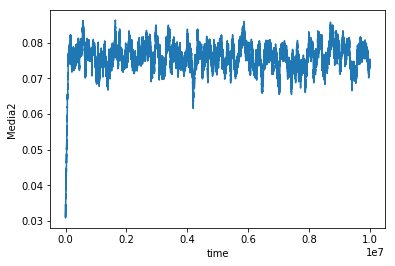

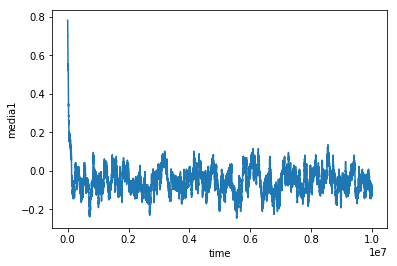

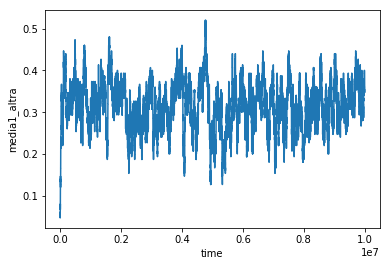

In [47]:
plt.plot(M)
plt.xlabel('time')
plt.ylabel('Media2')
plt.show() 

plt.plot(m1)
plt.xlabel('time')
plt.ylabel('media1')
plt.show() 

plt.plot(m2)
plt.xlabel('time')
plt.ylabel('media1_altra')
plt.show() 
